<a href="https://colab.research.google.com/github/ROSEVARGHESE95/Airport-traffic-analysis-2025/blob/main/AIRPORT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://www.eurocontrol.int/performance/data/download/csv/airport_traffic_2025.csv')
print(df.head())


   YEAR  MONTH_NUM MONTH_MON    FLT_DATE APT_ICAO    APT_NAME STATE_NAME  \
0  2025          1       JAN  2025-01-01     LATI      Tirana    Albania   
1  2025          1       JAN  2025-01-01     UDYZ     Yerevan    Armenia   
2  2025          1       JAN  2025-01-01     LOWG        Graz    Austria   
3  2025          1       JAN  2025-01-01     LOWI   Innsbruck    Austria   
4  2025          1       JAN  2025-01-01     LOWK  Klagenfurt    Austria   

   FLT_DEP_1  FLT_ARR_1  FLT_TOT_1  FLT_DEP_IFR_2  FLT_ARR_IFR_2  \
0         64         62        126            NaN            NaN   
1         57         54        111            NaN            NaN   
2          7          6         13            NaN            NaN   
3         24         25         49            NaN            NaN   
4          2          0          2            NaN            NaN   

   FLT_TOT_IFR_2  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  


In [57]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28080 entries, 0 to 28079
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YEAR           28080 non-null  int64  
 1   MONTH_NUM      28080 non-null  int64  
 2   MONTH_MON      28080 non-null  object 
 3   FLT_DATE       28080 non-null  object 
 4   APT_ICAO       28080 non-null  object 
 5   APT_NAME       28080 non-null  object 
 6   STATE_NAME     28080 non-null  object 
 7   FLT_DEP_1      28080 non-null  int64  
 8   FLT_ARR_1      28080 non-null  int64  
 9   FLT_TOT_1      28080 non-null  int64  
 10  FLT_DEP_IFR_2  6912 non-null   float64
 11  FLT_ARR_IFR_2  6912 non-null   float64
 12  FLT_TOT_IFR_2  6912 non-null   float64
dtypes: float64(3), int64(5), object(5)
memory usage: 2.8+ MB
None


In [58]:
print(df.describe())

          YEAR     MONTH_NUM     FLT_DEP_1     FLT_ARR_1     FLT_TOT_1  \
count  28080.0  28080.000000  28080.000000  28080.000000  28080.000000   
mean    2025.0      2.004843     62.825819     62.872258    125.698077   
std        0.0      0.829651    109.479859    109.401231    218.853315   
min     2025.0      1.000000      0.000000      0.000000      0.000000   
25%     2025.0      1.000000      5.000000      5.000000     10.000000   
50%     2025.0      2.000000     16.000000     16.000000     33.000000   
75%     2025.0      3.000000     72.000000     72.000000    144.000000   
max     2025.0      3.000000    775.000000    766.000000   1541.000000   

       FLT_DEP_IFR_2  FLT_ARR_IFR_2  FLT_TOT_IFR_2  
count    6912.000000    6912.000000    6912.000000  
mean      169.444734     169.187645     338.632378  
std       155.978591     155.873513     311.795768  
min         0.000000       0.000000       1.000000  
25%        65.000000      65.000000     130.000000  
50%       112.0

In [59]:
print(df.shape)
print("no of columns:",len(list(df.columns)))
print(df.columns)
numerical_columns=[x for x in df.columns if df[x].dtype!='O']
cat_columns=[x for x in df.columns if df[x].dtype =='O']
print("Numerical columns:",numerical_columns)
print("Categorical columns:",cat_columns)

(28080, 13)
no of columns: 13
Index(['YEAR', 'MONTH_NUM', 'MONTH_MON', 'FLT_DATE', 'APT_ICAO', 'APT_NAME',
       'STATE_NAME', 'FLT_DEP_1', 'FLT_ARR_1', 'FLT_TOT_1', 'FLT_DEP_IFR_2',
       'FLT_ARR_IFR_2', 'FLT_TOT_IFR_2'],
      dtype='object')
Numerical columns: ['YEAR', 'MONTH_NUM', 'FLT_DEP_1', 'FLT_ARR_1', 'FLT_TOT_1', 'FLT_DEP_IFR_2', 'FLT_ARR_IFR_2', 'FLT_TOT_IFR_2']
Categorical columns: ['MONTH_MON', 'FLT_DATE', 'APT_ICAO', 'APT_NAME', 'STATE_NAME']


In [61]:
#data preprocesssing
df = df.drop_duplicates()
print("After removing duplicates:",df.shape)

# Convert FLT_DATE to datetime
df['FLT_DATE'] = pd.to_datetime(df['FLT_DATE'])
df['FLT_DATE']

After removing duplicates: (28080, 13)


,FLT_DATE
0,2025-01-01
1,2025-01-01
2,2025-01-01
3,2025-01-01
4,2025-01-01
...,...
28075,2025-03-31
28076,2025-03-31
28077,2025-03-31
28078,2025-03-31


In [62]:
missing_values = df.isnull().sum()
print(missing_values)

YEAR                 0
MONTH_NUM            0
MONTH_MON            0
FLT_DATE             0
APT_ICAO             0
APT_NAME             0
STATE_NAME           0
FLT_DEP_1            0
FLT_ARR_1            0
FLT_TOT_1            0
FLT_DEP_IFR_2    21168
FLT_ARR_IFR_2    21168
FLT_TOT_IFR_2    21168
dtype: int64


In [63]:
# Fill missing IFR values with 0 (or use imputation methods)
#df[['FLT_DEP_IFR_2', 'FLT_ARR_IFR_2', 'FLT_TOT_IFR_2']]=df[['FLT_DEP_IFR_2','FLT_ARR_IFR_2','FLT_TOT_IFR_2']].fillna(0)

# Fill numeric columns with median, categorical with mode
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())


In [64]:
df.isnull().sum()

,0
YEAR,0
MONTH_NUM,0
MONTH_MON,0
FLT_DATE,0
APT_ICAO,0
APT_NAME,0
STATE_NAME,0
FLT_DEP_1,0
FLT_ARR_1,0
FLT_TOT_1,0


In [66]:
#Label Encoding for categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])
df.head()

,YEAR,MONTH_NUM,MONTH_MON,FLT_DATE,APT_ICAO,APT_NAME,STATE_NAME,FLT_DEP_1,FLT_ARR_1,FLT_TOT_1,FLT_DEP_IFR_2,FLT_ARR_IFR_2,FLT_TOT_IFR_2
0,2025,1,1,2025-01-01,142,298,0,64,62,126,112.0,113.0,225.0
1,2025,1,1,2025-01-01,327,323,1,57,54,111,112.0,113.0,225.0
2,2025,1,1,2025-01-01,293,102,2,7,6,13,112.0,113.0,225.0
3,2025,1,1,2025-01-01,294,119,2,24,25,49,112.0,113.0,225.0
4,2025,1,1,2025-01-01,295,134,2,2,0,2,112.0,113.0,225.0


In [67]:
df.dtypes

,0
YEAR,int64
MONTH_NUM,int64
MONTH_MON,int64
FLT_DATE,datetime64[ns]
APT_ICAO,int64
APT_NAME,int64
STATE_NAME,int64
FLT_DEP_1,int64
FLT_ARR_1,int64
FLT_TOT_1,int64


In [68]:
df.dropna(inplace=True)

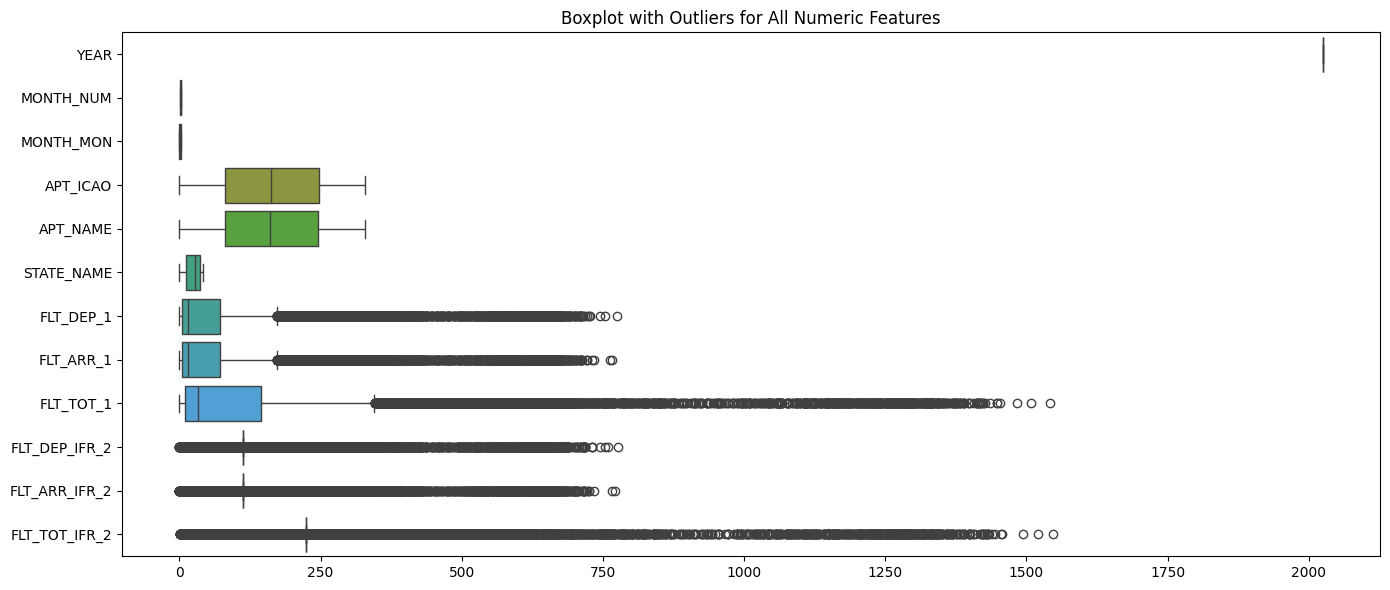

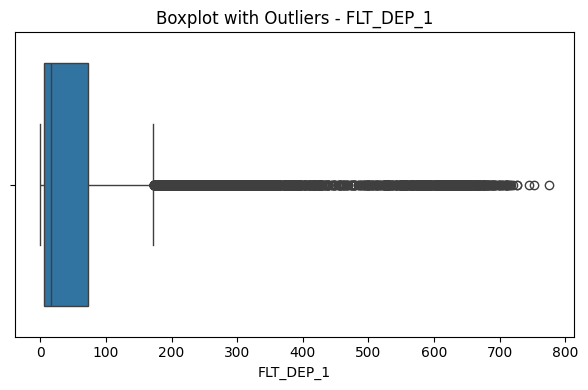

Outliers in FLT_DEP_1: 2857


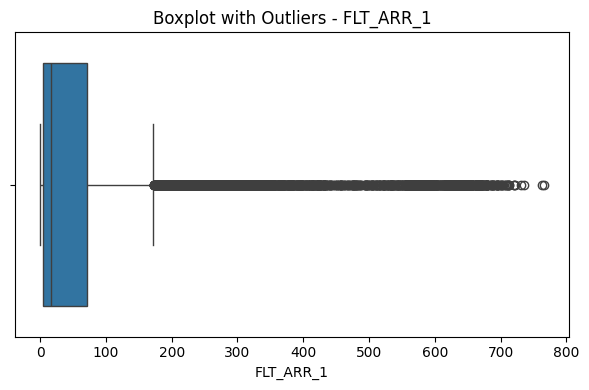

Outliers in FLT_ARR_1: 2864


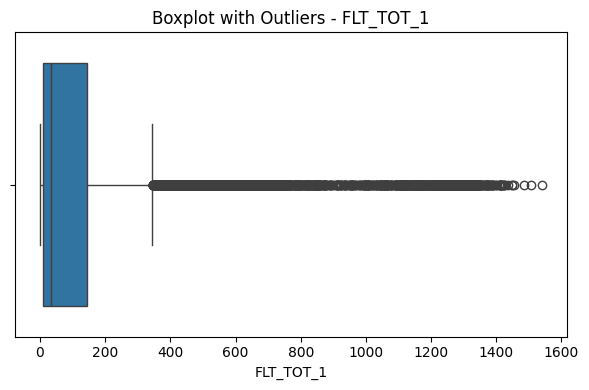

Outliers in FLT_TOT_1: 2857


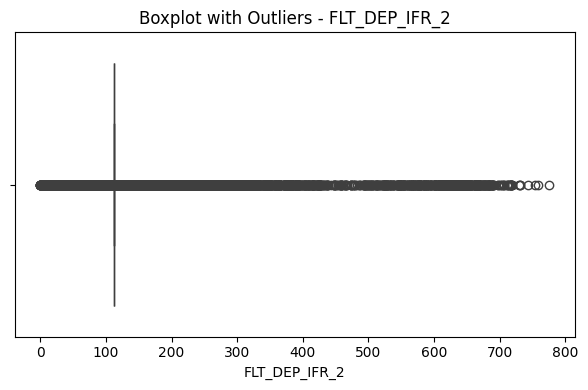

Outliers in FLT_DEP_IFR_2: 6888


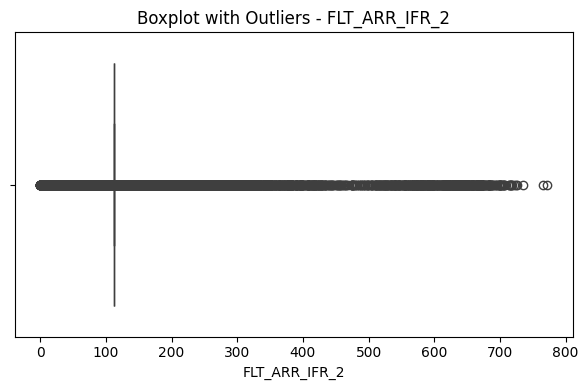

Outliers in FLT_ARR_IFR_2: 6888


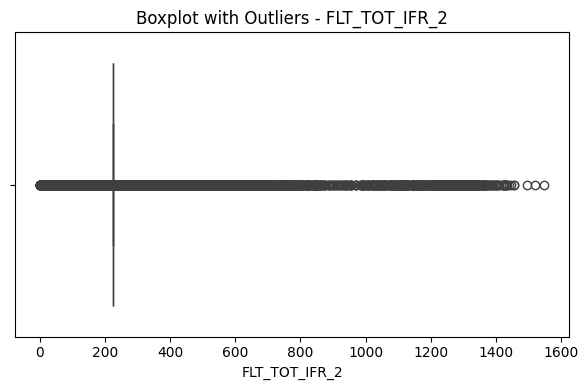

Outliers in FLT_TOT_IFR_2: 6903

Shape after outlier removal: (20588, 13)


In [55]:
#Outlier detection & removal using IQR
numeric_cols = df.select_dtypes(include=np.number).columns
outlier_indices = set()
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[numeric_cols], orient="h")
plt.title("Boxplot with Outliers for All Numeric Features")
plt.tight_layout()
plt.show()
#Boxplot for numeric feature with outliers
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index

    if len(outliers) > 0:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot with Outliers - {col}")
        plt.tight_layout()
        plt.show()
        print(f"Outliers in {col}: {len(outliers)}")

    outlier_indices.update(outliers)

df_cleaned = df.drop(index=outlier_indices)
print("\nShape after outlier removal:", df_cleaned.shape)


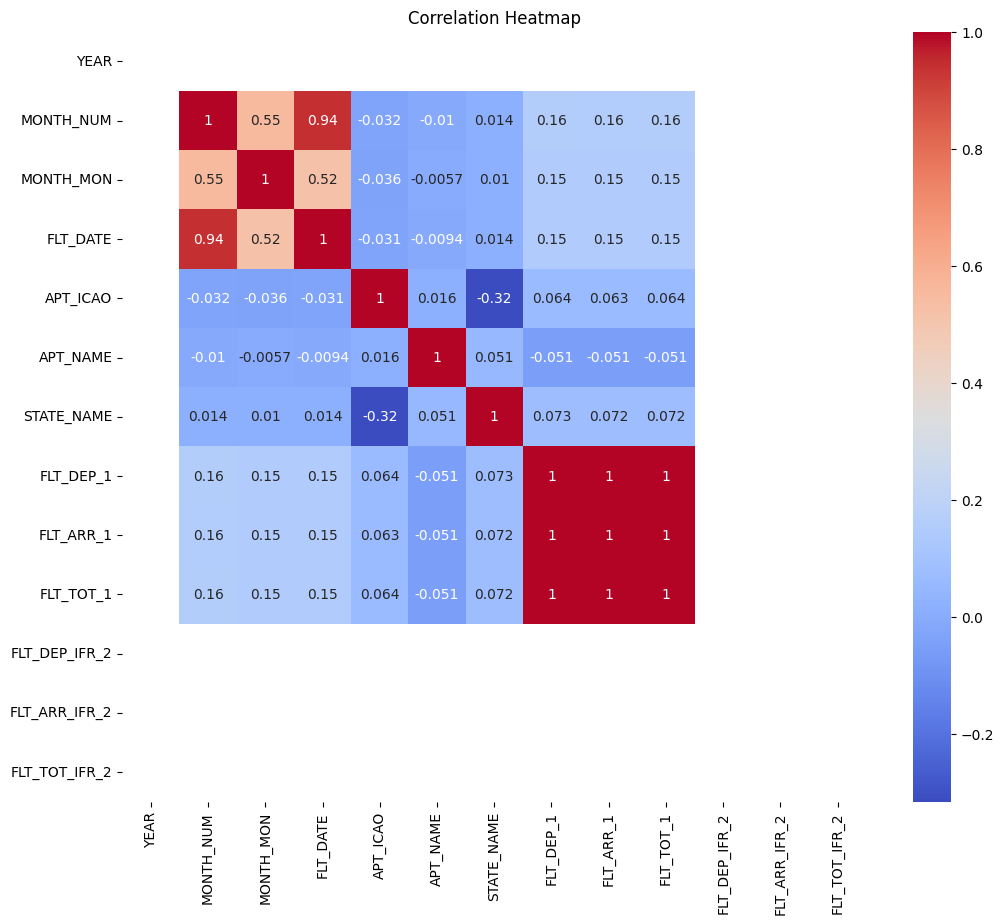

In [69]:
#correlation heat map
plt.figure(figsize=(12, 10))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

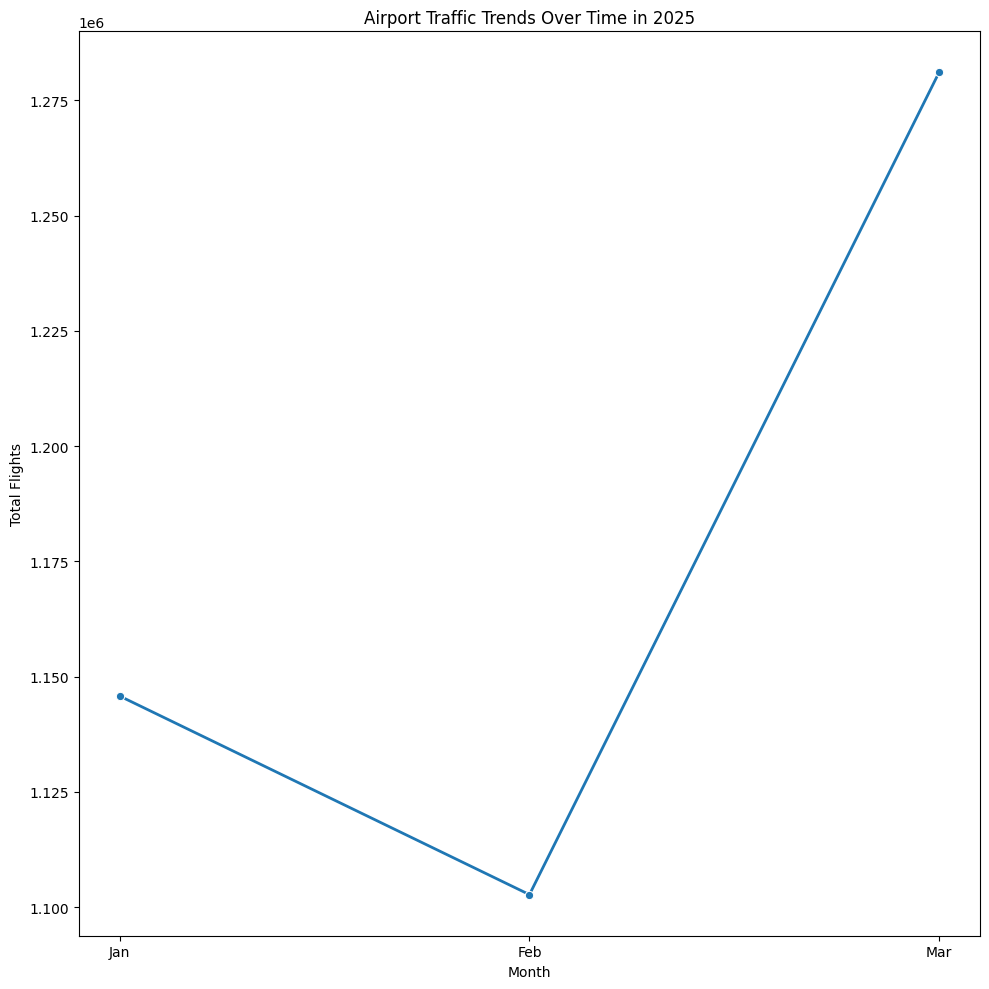

In [70]:
#Group by Month for Trend Analysis
monthly_traffic = df.groupby('MONTH_NUM')['FLT_TOT_1'].sum().reset_index()
monthly_traffic['Month'] = monthly_traffic['MONTH_NUM'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%b'))

# Ensure months are in calendar order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_traffic['Month'] = pd.Categorical(monthly_traffic['Month'], categories=month_order, ordered=True)
monthly_traffic = monthly_traffic.sort_values('Month')

# Visualization - Monthly Flight Trend
plt.figure(figsize=(10, 10))
sns.lineplot(data=monthly_traffic, x='Month', y='FLT_TOT_1', marker='o', linewidth=2)
plt.title('Airport Traffic Trends Over Time in 2025')
plt.xlabel('Month')
plt.ylabel('Total Flights')
plt.tight_layout()
plt.show()











<ipython-input-71-117ceac09646>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_traffic, x='Month', y='FLT_TOT_1', palette='Blues_d')


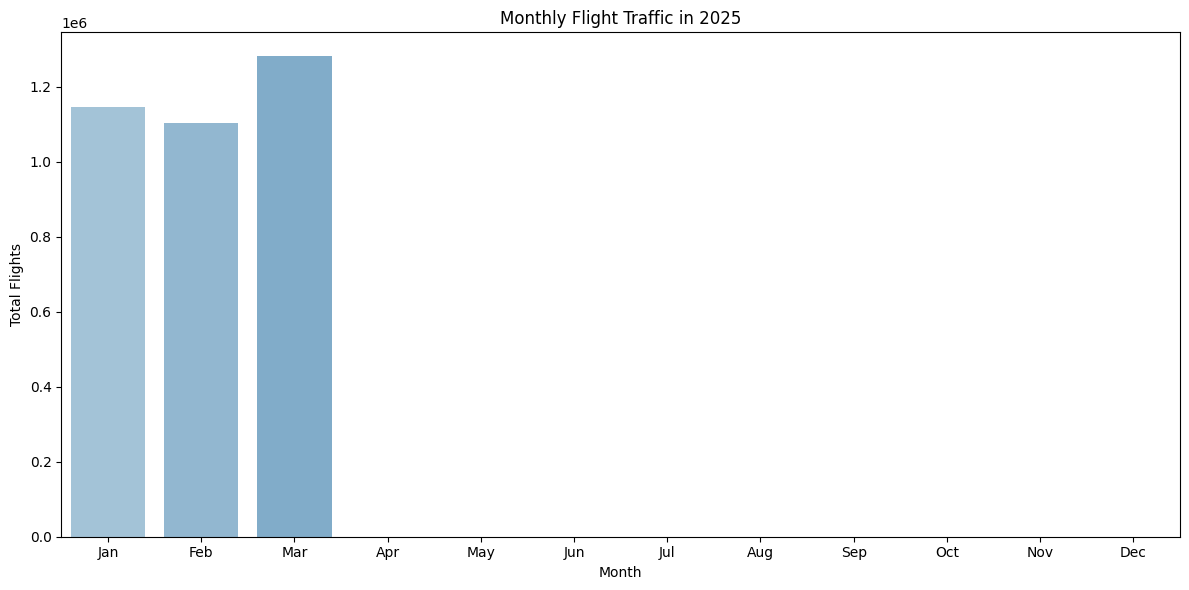

In [71]:
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_traffic, x='Month', y='FLT_TOT_1', palette='Blues_d')
plt.title('Monthly Flight Traffic in 2025')
plt.xlabel('Month')
plt.ylabel('Total Flights')
plt.tight_layout()
plt.show()

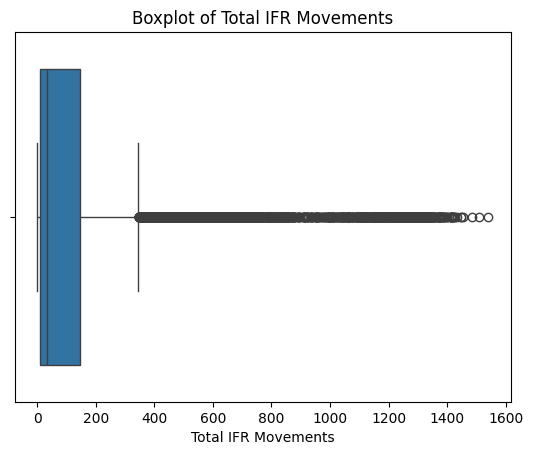

In [72]:
sns.boxplot(x=df['FLT_TOT_1'])
plt.title('Boxplot of Total IFR Movements')
plt.xlabel('Total IFR Movements')
plt.show()

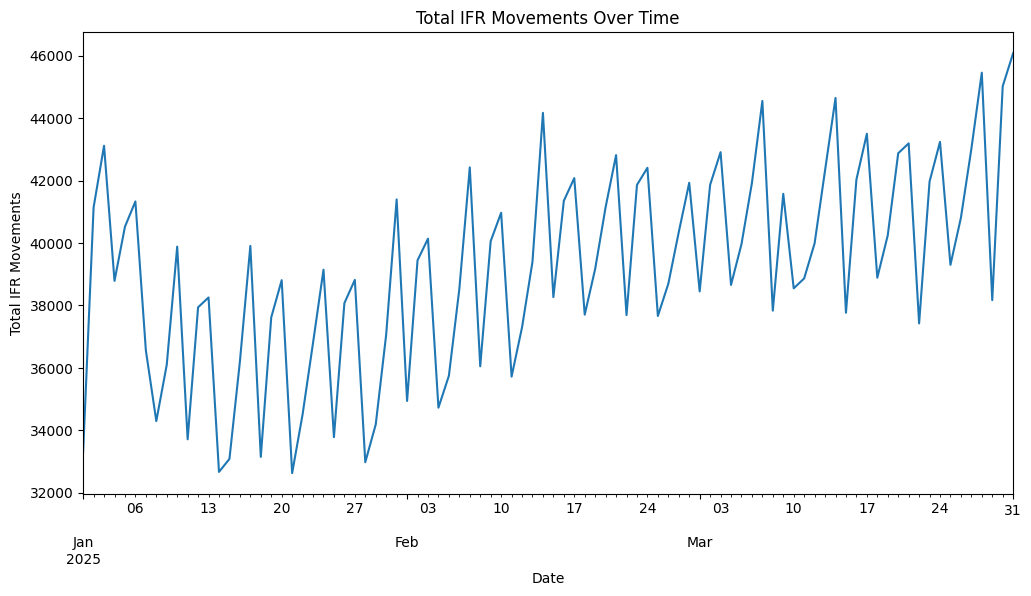

In [73]:
df.groupby('FLT_DATE')['FLT_TOT_1'].sum().plot(figsize=(12,6))
plt.title('Total IFR Movements Over Time')
plt.xlabel('Date')
plt.ylabel('Total IFR Movements')
plt.show()